 TRAIN THE DATA BY SVR ALGORITHM FOR REGRESSION PROBLEM  

In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# ml libraries
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder 

In [3]:
# import the data 
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# make the x and y in our data 
x=df.drop('species',axis=1)
y=df['species']


In [8]:
#train test split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform y_train (and y_test if applicable)
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [10]:
model = SVR(kernel='rbf')
model.fit(x_train, y_train_encoded)

# Predict using the model
y_pred = model.predict(x_test)

In [11]:
# Step 4: Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test_encoded, y_pred)
print(f"r2_score: {r2}")

Mean Squared Error: 0.04024015673568521
r2_score: 0.9424226692176205


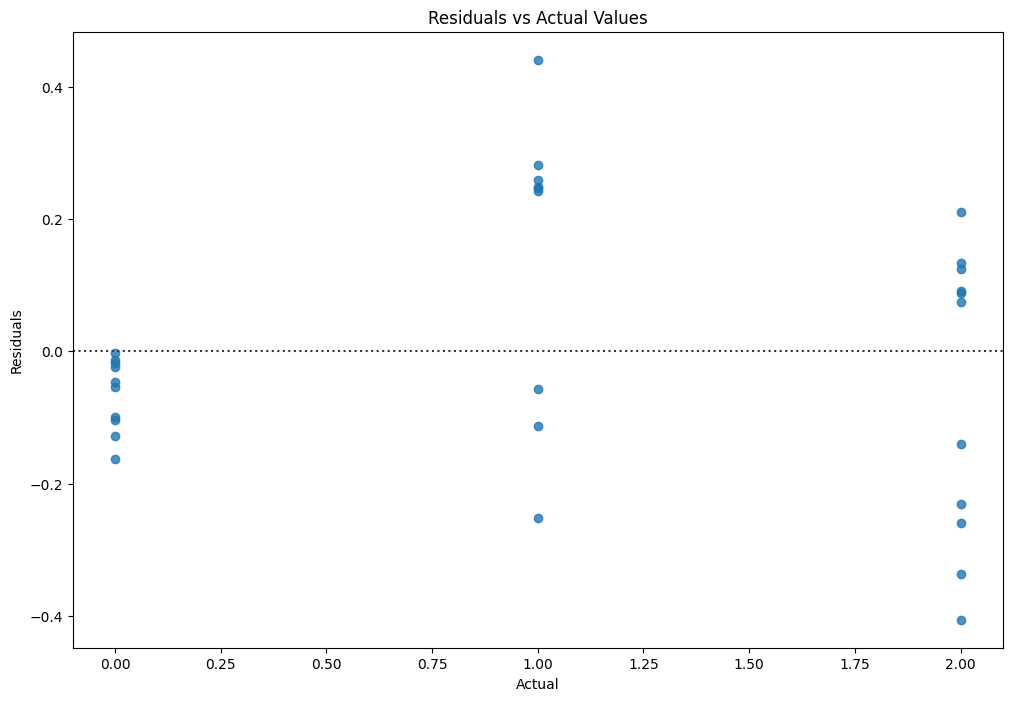

In [13]:
# Residual plot (difference between actual and predicted)
plt.figure(figsize=(12, 8))
sns.residplot(x=y_test_encoded, y=y_pred, lowess=False)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()
